# chaotic population growth, bifurcations, Feigenbaum constant
Implementing very standard equations relating to population growth that easily lead to chaotic behaviour, bifurcation diagrams and the Feigenbaum constant.

Logistic equation/map:
$x_{n + 1} = rx(1-x)$ can be written as: $y = rx-rx^2$ or $y = r(x-x^2)$

## plotting $x_n$ vs $x_{n+1}$

## TODO
- completely refactor to display the sliders to the side or otherwise get rid of the annoying updating-bug
-  see this https://jupyter-flex.danielfrg.com/widgets-voila/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# open from conda env voila
# set kernel to voila
# replace notebooks with voila/render to render

In [12]:
#@title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import fixed, Layout, HBox
#from ipywidgets import interactive, fixed, IntSlider, HBox, Layout

%config InlineBackend.figure_format = 'retina'
#plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
#plt.style.use("dark_background")


In [3]:
# functions implementing 
def log_map(start = 0.6, n = 10, r = 1):
    
    """
    iterates a population growth according to $x_{n + 1} = rx(1-x)$
    
    start: starting population as fraction of max population
    n: number of iterations (eg years)
    r: nonlinearity parameter (suggestions: .8, 2.5, 3.1, 3.8)
    """
    
    result = np.zeros(n)
    result[0] = start
    
    for i in range(1,n):
        result[i] = r * result[i-1] * (1 - result[i-1])
        
    return result

def log_func(x, r):
    
    """
    makes the curve $x_{n + 1} = rx(1-x)$ if x is an equally spaced array
    gives next x if x is a scalar
    """
    
    return r * x * (1-x)
    #return r * x - r * x**2 equivalent
    
def bifurcate(r_range = (0,4), n_rs = 1000, n_iterations=1000, k_points=150, start= .6, plot = False, ax = None):
        
    """
    generates and plots bifurcations
    r_range: iterable of bounds on r
    n_rs: integer specifying number of rs
    n_iterations: how many iterations will be computed for the bifurcation to settle
    k_points: how many points will be plotted/included in result
    start: population starting value
    plot: set to True to plot
    ax: ax to plot on, creates new one if not specified
    """
    
    rs = np.linspace(*r_range, n_rs)
    result = np.zeros((len(rs), k_points))
    
    for i, r in enumerate(rs):
        result[i] = log_map(n = n_iterations, r = r)[-k_points:]
    
    
    # plotting
    if plot:
        if ax is None:
            plt.scatter(np.tile(rs, (k_points, 1)).T.flatten(), result.flatten(), s = 1)
        else:
            ax.scatter(np.tile(rs, (k_points, 1)).T.flatten(), result.flatten(), s = 1)
    
    return result, rs, k_points

In [13]:
# make widget with sliders for the parameters
r_min = 0
r_max = 4



result_, rs, k_points = bifurcate(r_range = (r_min,r_max), n_iterations=150, k_points=50, plot= False)#, ax = ax3)


@widgets.interact(start = widgets.FloatSlider(value=.3, min=0, max=1, step=0.1),
                  #n = widgets.IntSlider(value=50, min=0, max=100, step=1), 
                  r = widgets.FloatSlider(value=.8, min=r_min, max=r_max, step=0.1))

def plot_log_map(start, r):
    # iterate the population
    n = 50
    result = log_map(start, n, r)
    
    # init figure
    fig = plt.figure(figsize = (12, 12))

    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(212)

    # copy y for x_n vs x_n+1 step plot
    y = result.copy()
    y[0] = 0
    x= np.linspace(0,1)
    
    # plot population dynamics
    ax1.plot(result) 
    
    ## plot step plot
    # logistic function
    ax2.plot(x, log_func(x, r))
    # identity line
    ax2.plot(x, x)
    ax2.step(result, y)#, ms = 5, marker = 'o')
    # points
    ax2.scatter(result, y, color = 'g')#, s = 20)
    ax2.scatter(np.roll(result, 1), y, color = 'g')#, s = 20)
    
    #axs[1].scatter(y, result)
    
    bifurcate(r_range = (r_min,r_max), plot= True, ax = ax3)
    ax3.scatter(np.tile(rs, (k_points, 1)).T.flatten(), result_.flatten(), s = 1)
    ax3.vlines(r, -0.01, 1)
    
    # set ax limits
    ax1.set_ylim(0,1)
    ax2.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax3.set_ylim(-0.01,1)
    ax3.set_xlim(0, 4)
    
    

interactive(children=(FloatSlider(value=0.3, description='start', max=1.0), FloatSlider(value=0.8, description…

## TODO
- pre-compute the results andthen make a widget to go to the respective bifurcation points
- possibly zoom in?

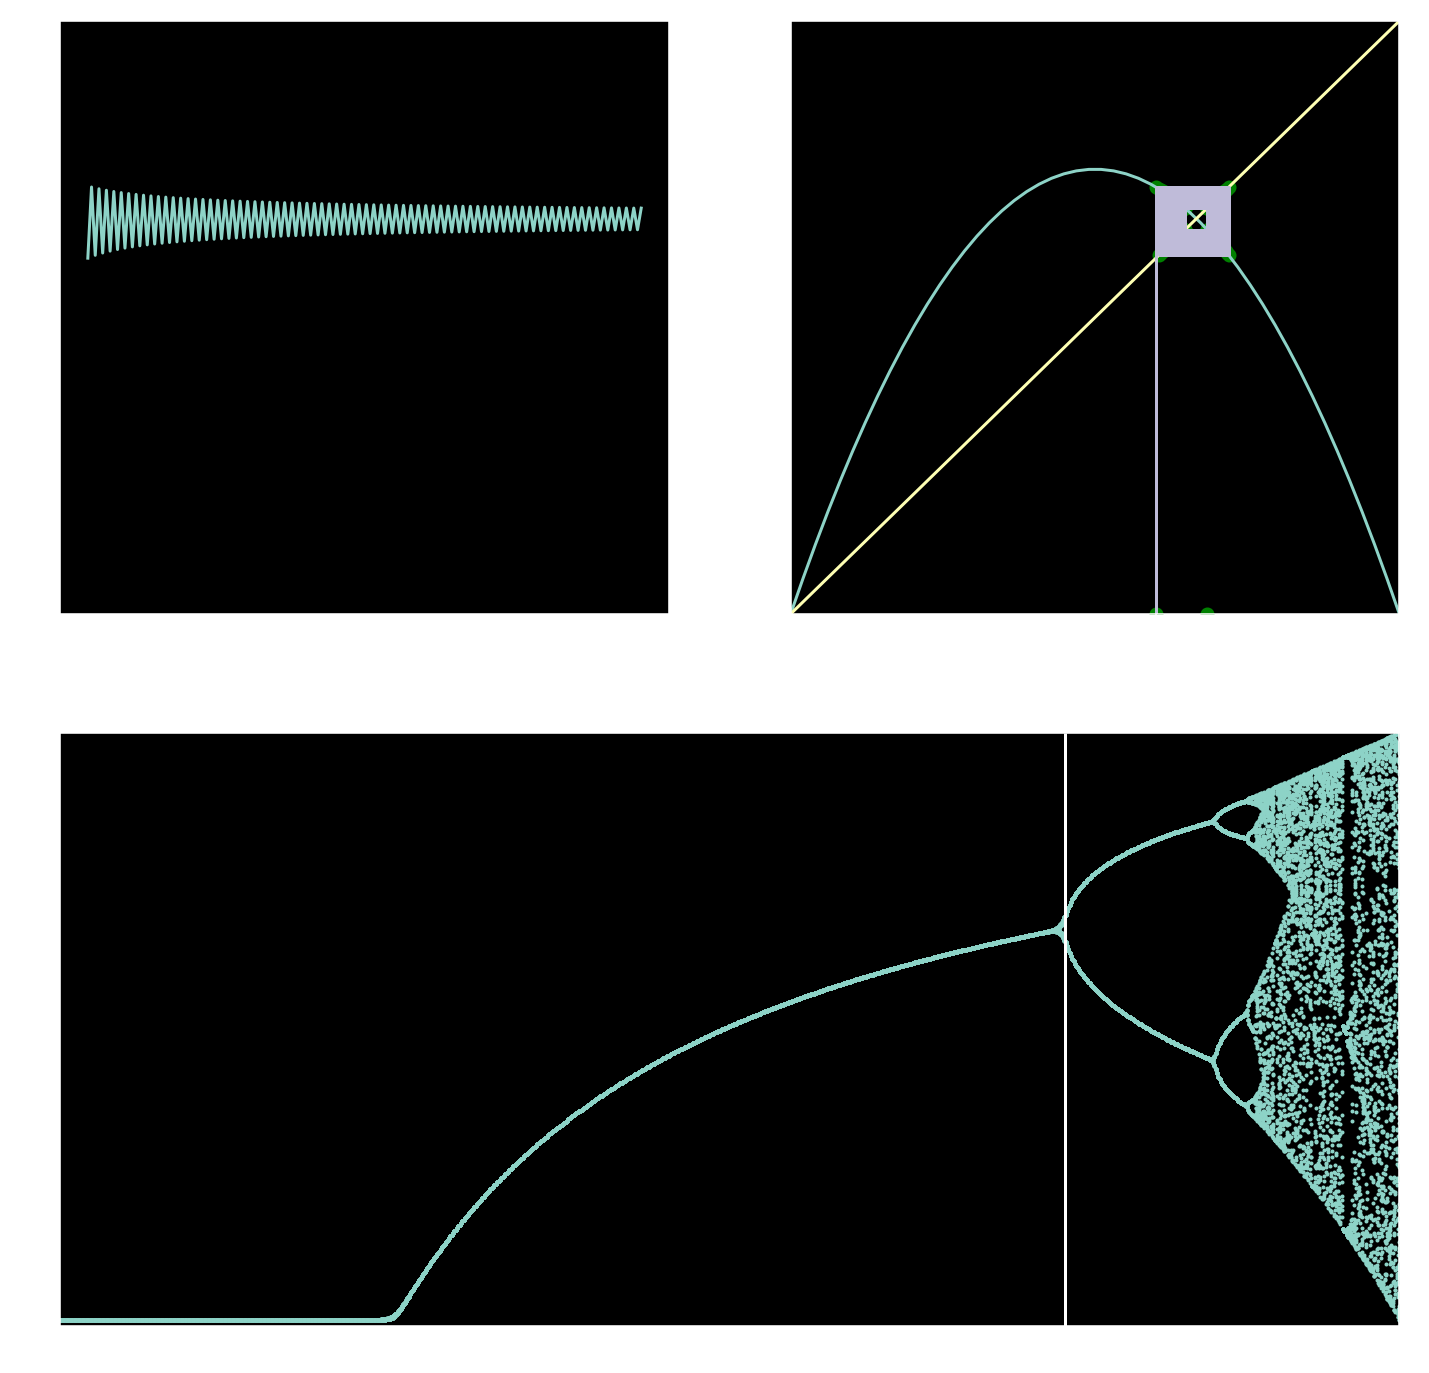

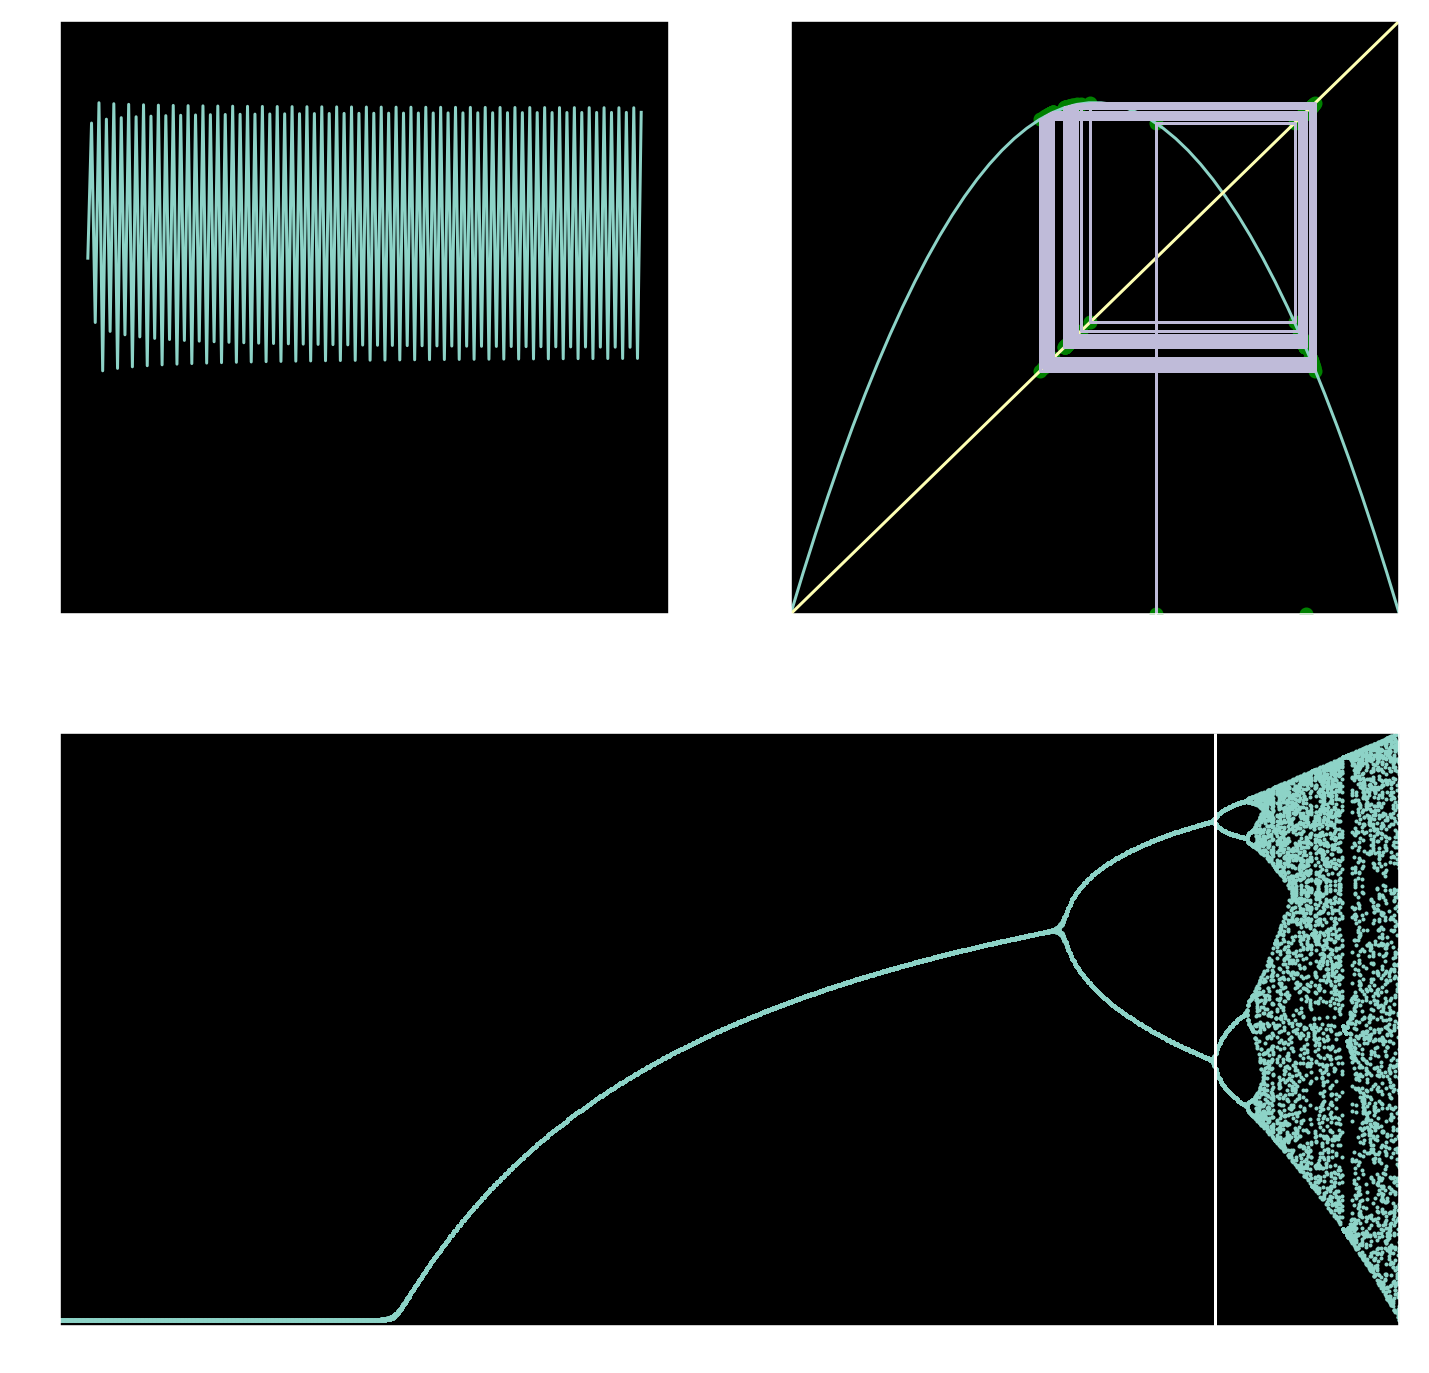

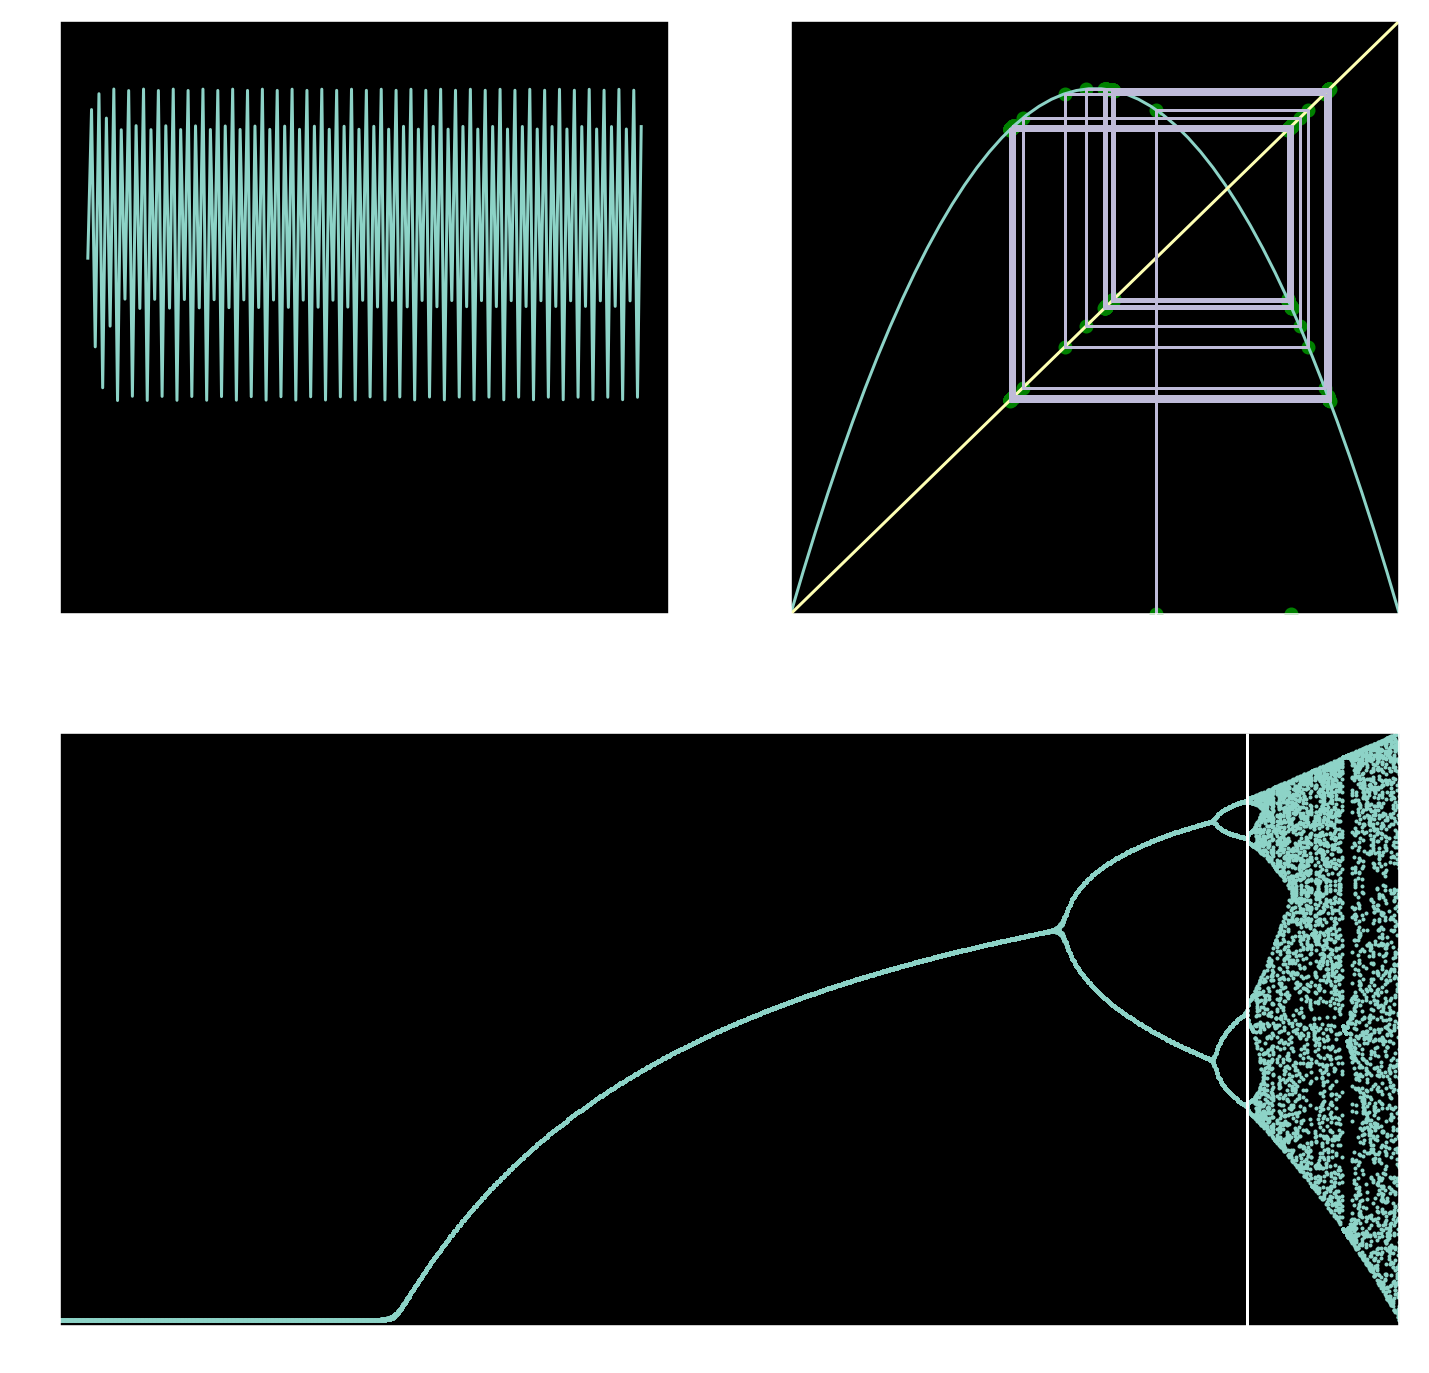

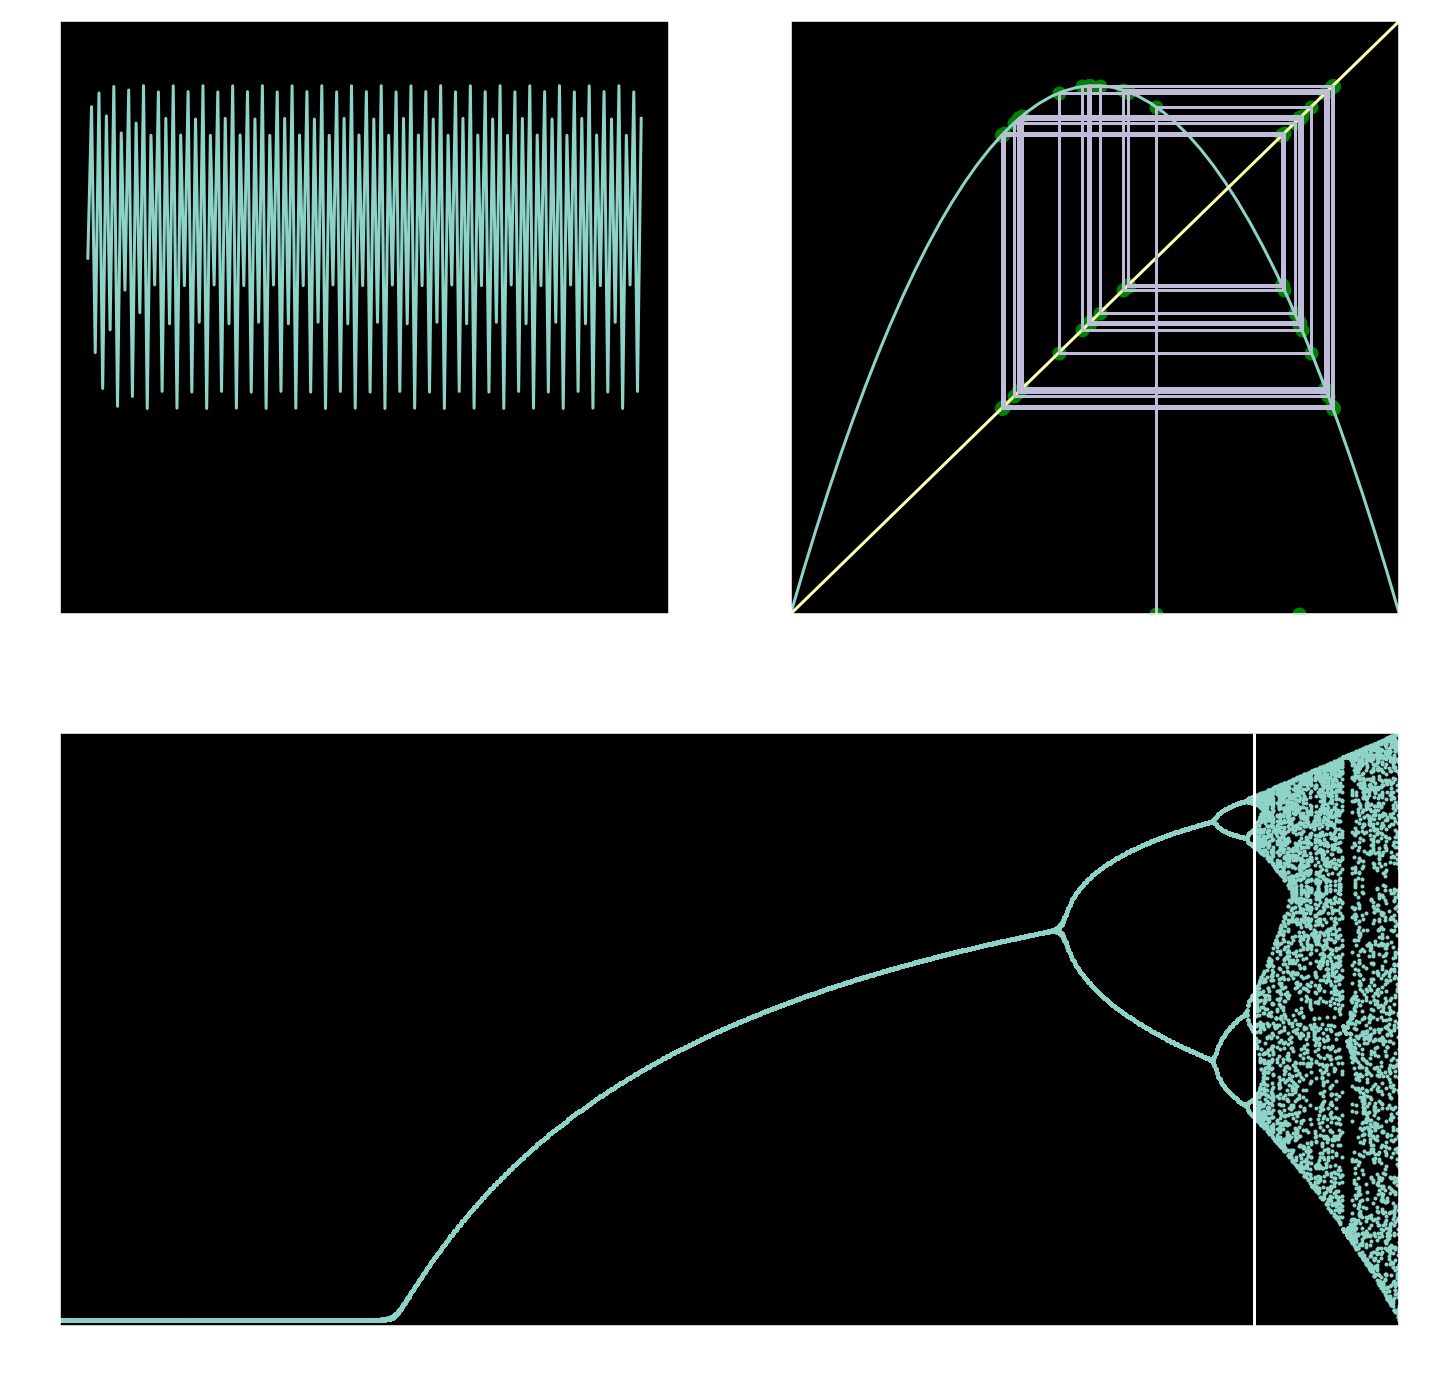

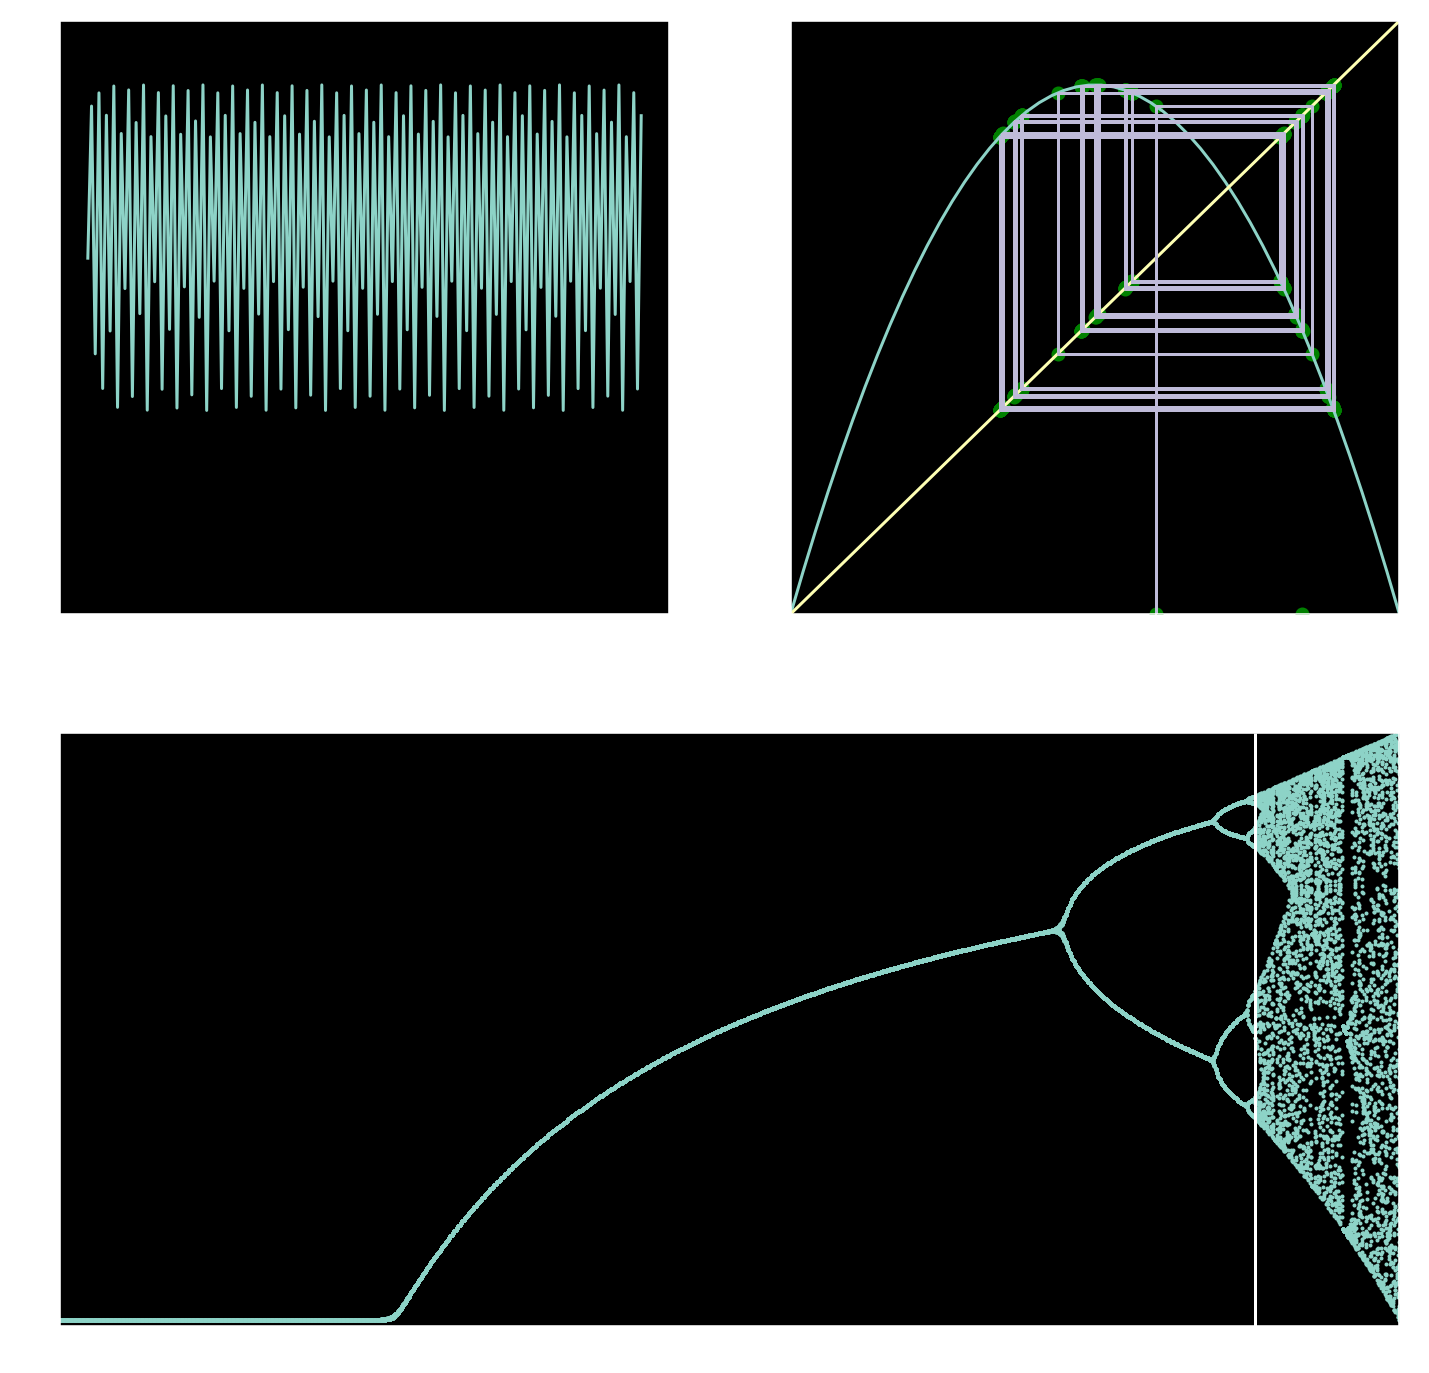

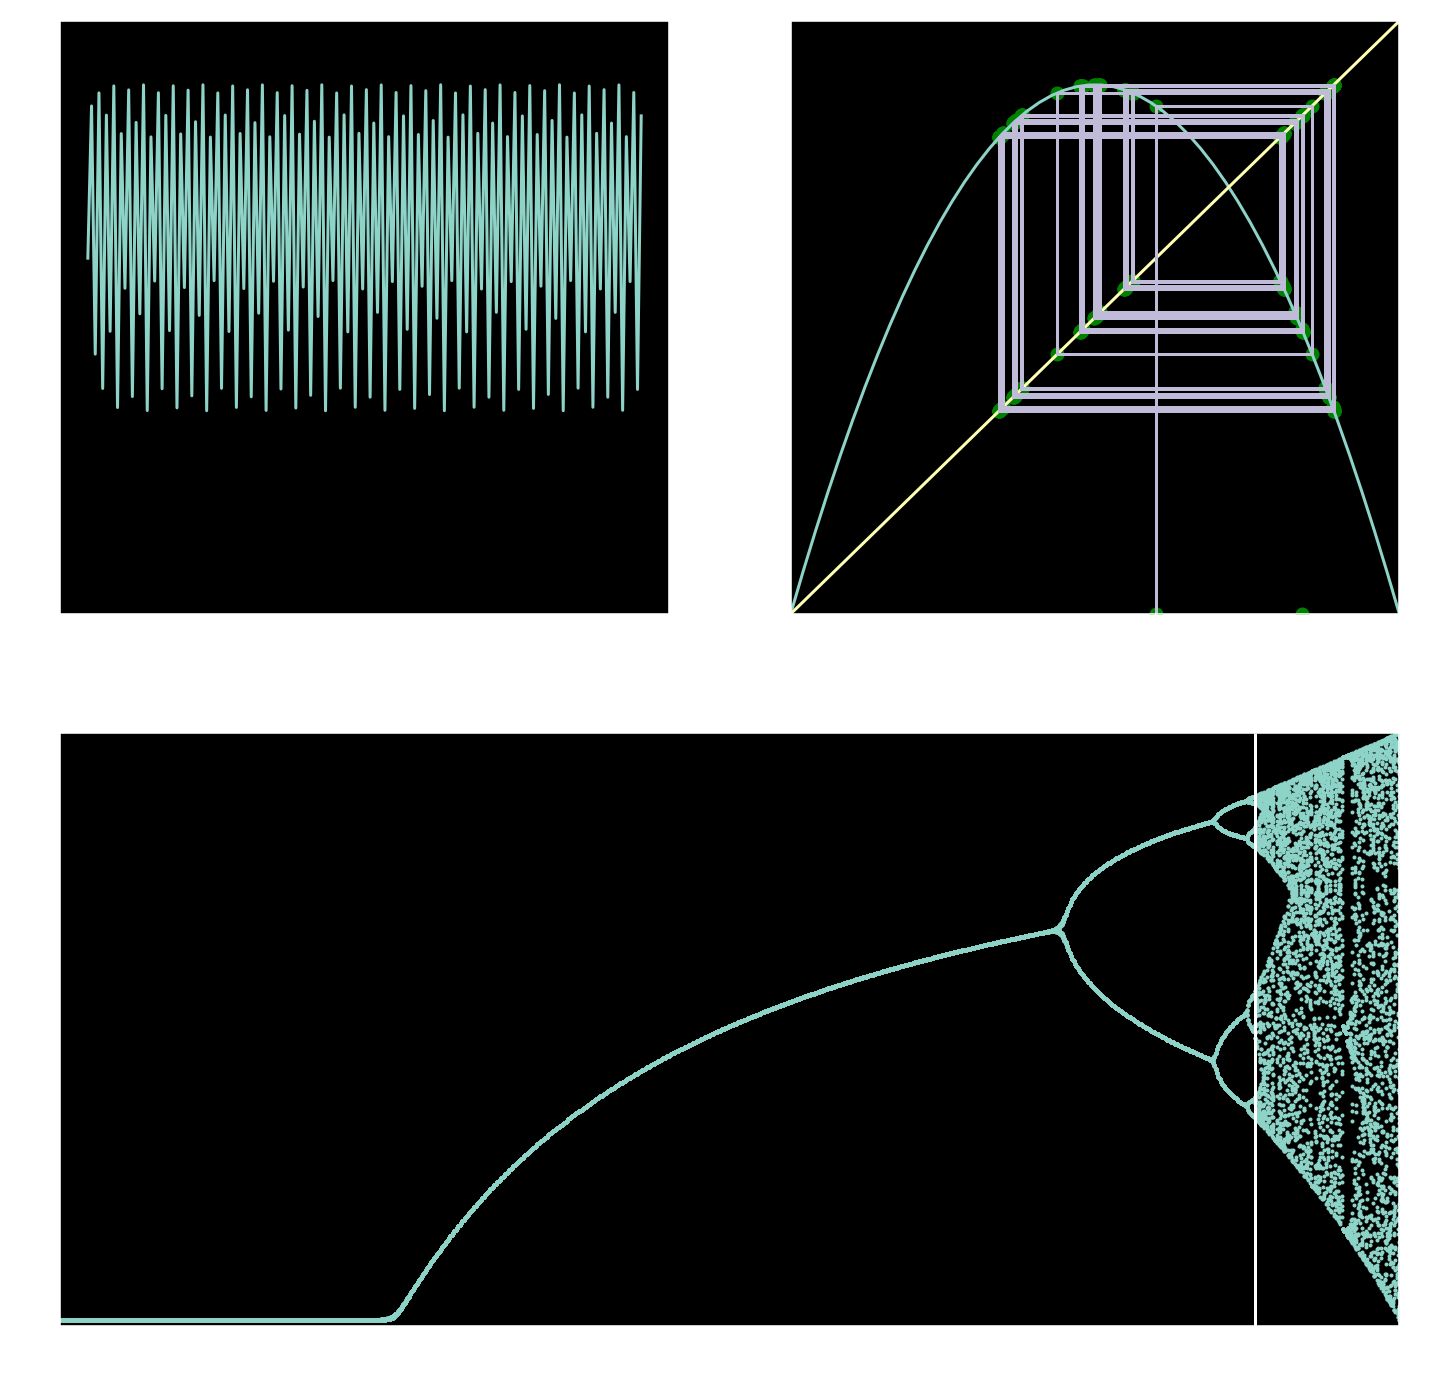

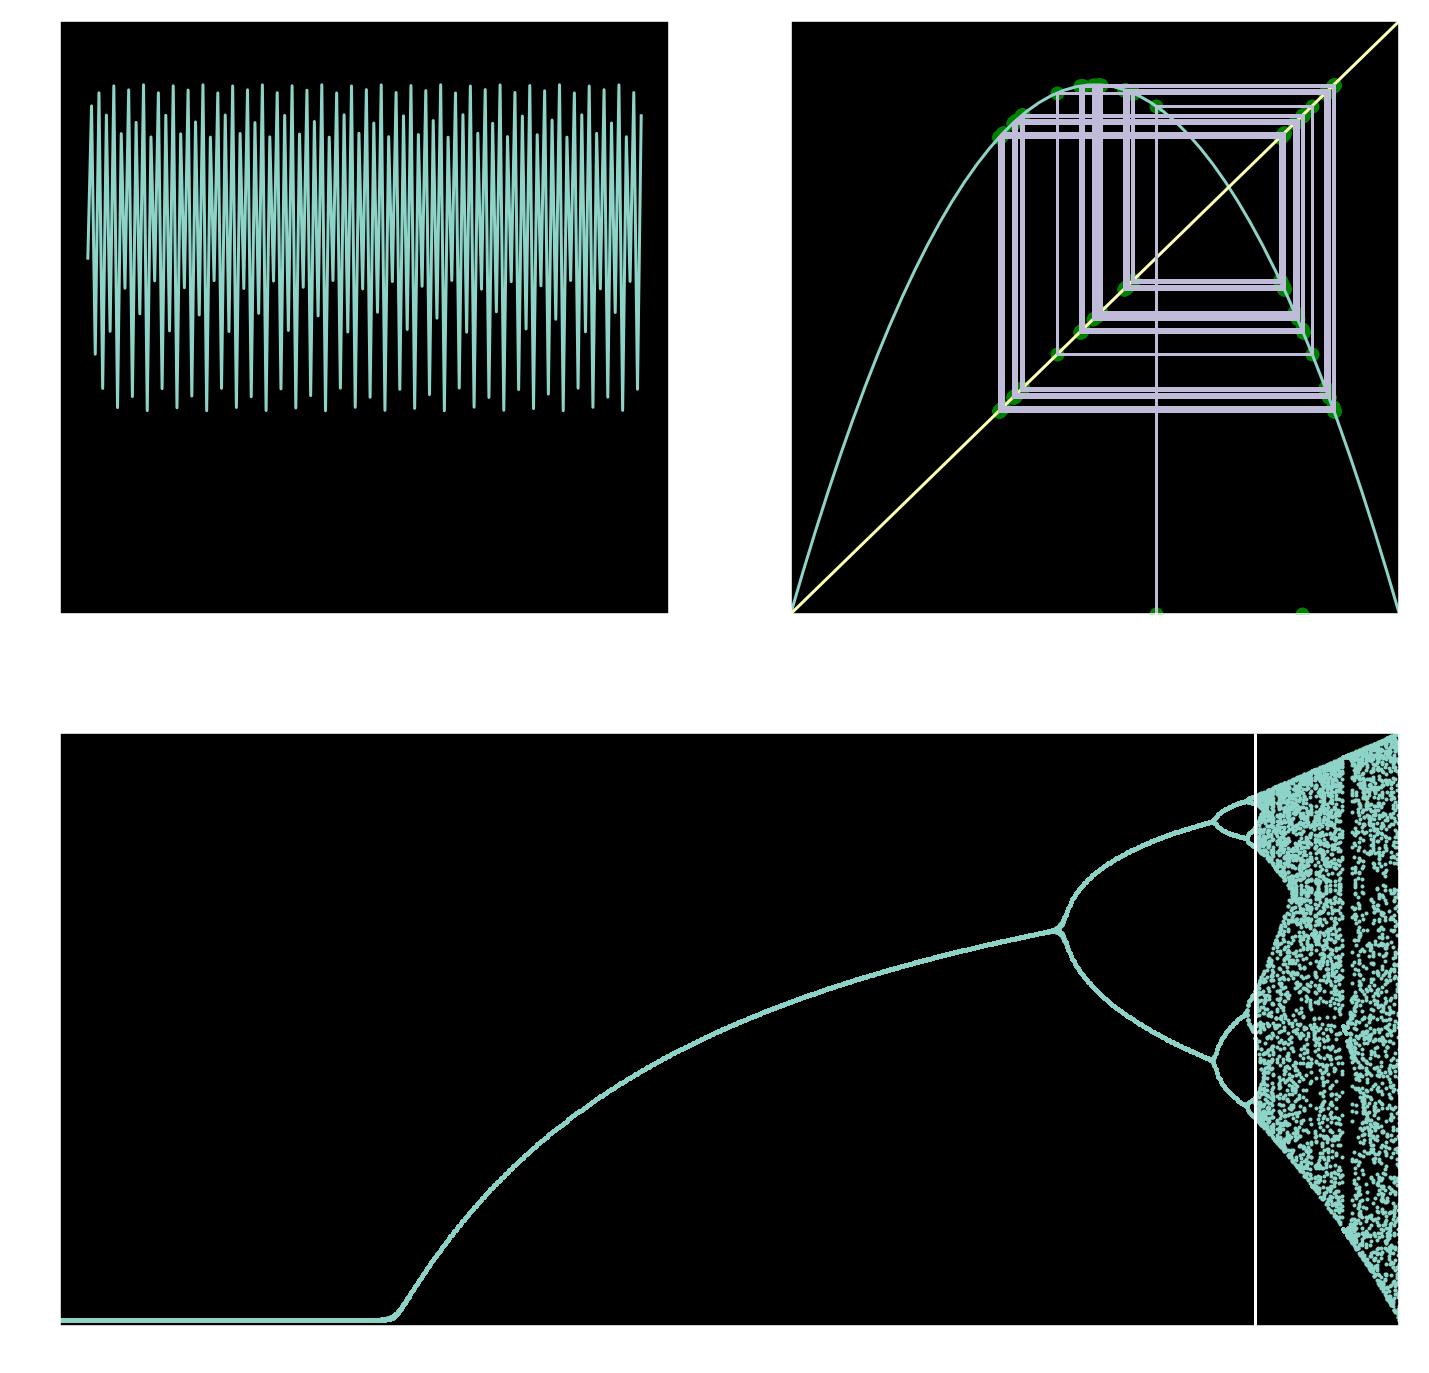

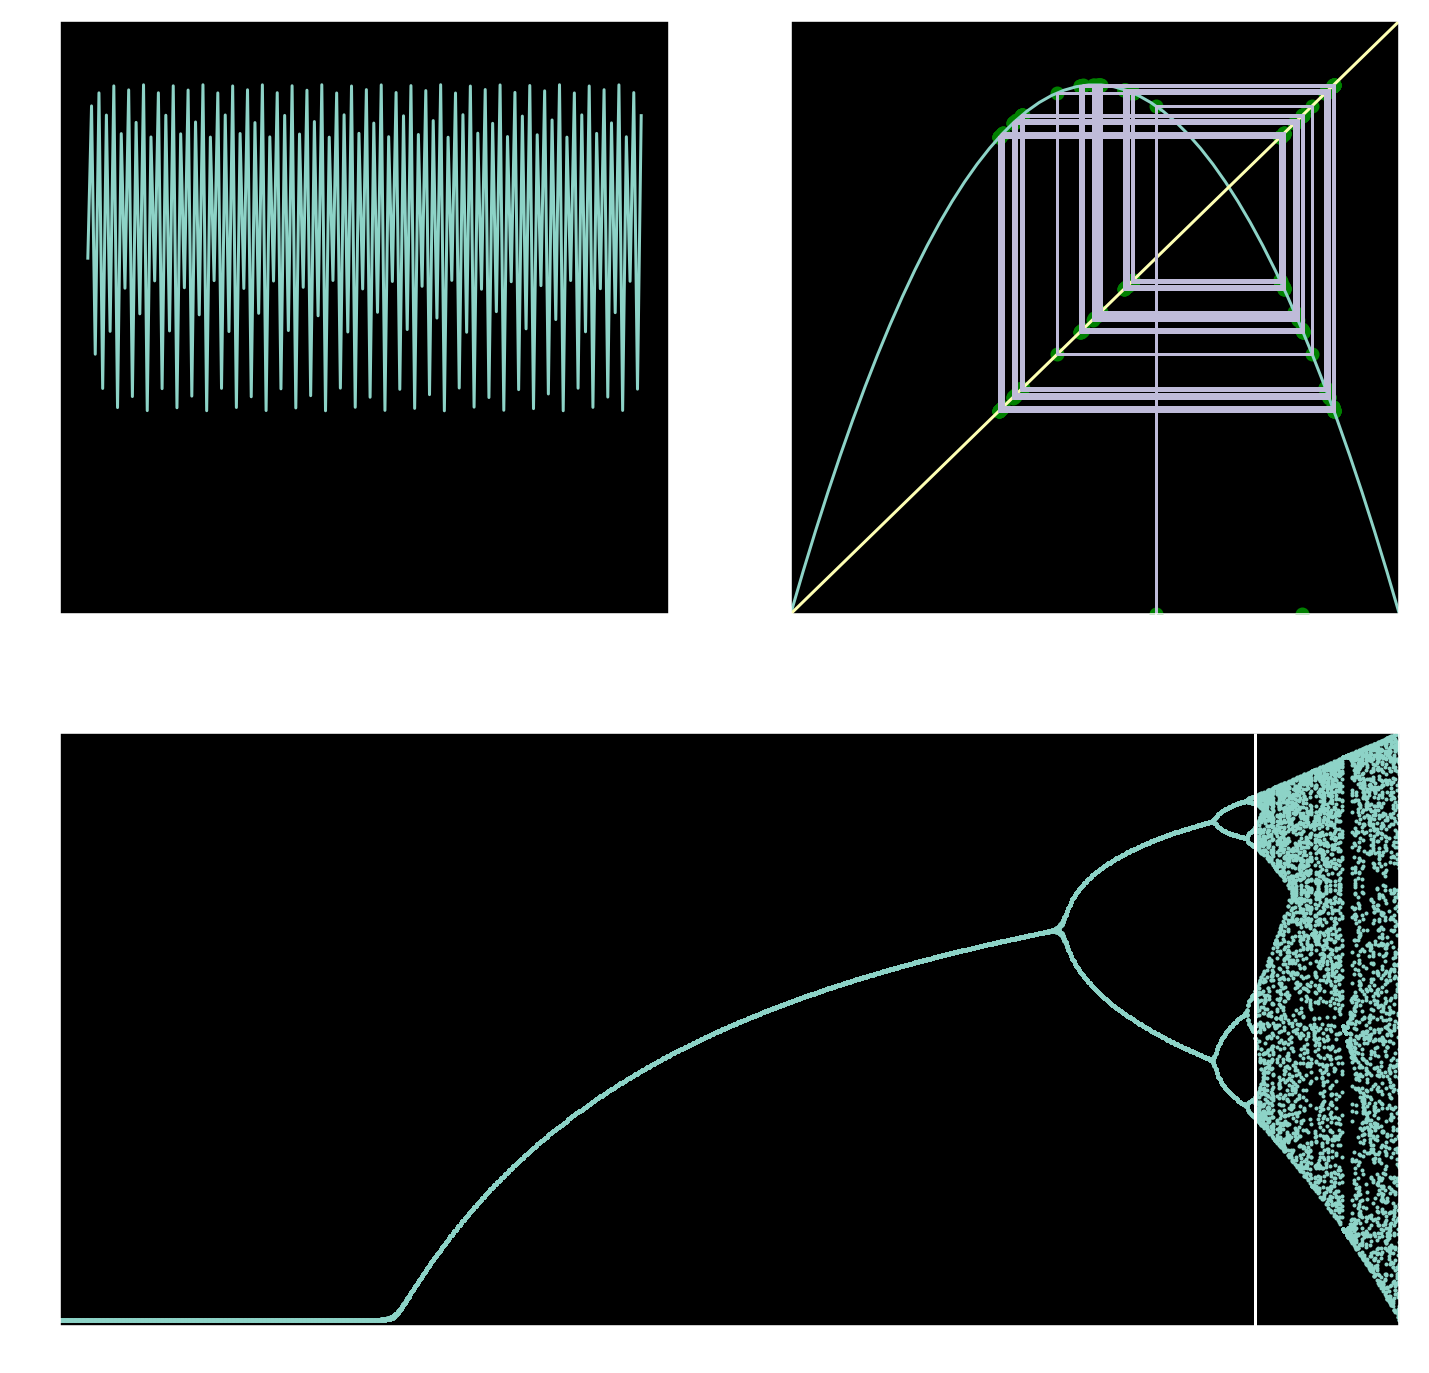

In [35]:
# no widget version
r_min = 0
r_max = 4



#result_, rs, k_points = bifurcate(r_range = (r_min,r_max), n_iterations=150, k_points=50, plot= False, ax = ax3)
start = .6
r2 = 3
r4 = 3.4494897
r8 = 3.5440903
r16 = 3.5644073
r32 = 3.5687594
r64 = 3.5696916
r128 = 3.5698913
r256 = 3.5699340
r = r2

for r in [r2, r4, r8, r16, r32, r64, r128, r256]:
    # iterate the population
    n = 150
    result = log_map(start, n, r)

    # init figure
    fig = plt.figure(figsize = (12, 12))

    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(212)

    # copy y for x_n vs x_n+1 step plot
    y = result.copy()
    y[0] = 0
    x = np.linspace(0,1)

    # plot population dynamics
    ax1.plot(result) 

    ## plot step plot
    # logistic function
    ax2.plot(x, log_func(x, r))
    # identity line
    ax2.plot(x, x)
    ax2.step(result, y)#, ms = 5, marker = 'o')
    # points
    ax2.scatter(result, y, color = 'g')#, s = 20)
    ax2.scatter(np.roll(result, 1), y, color = 'g')#, s = 20)

    #axs[1].scatter(y, result)

    bifurcate(r_range = (r_min,r_max), n_iterations=150, k_points=50, plot= True, ax = ax3)
    #ax3.scatter(np.tile(rs, (k_points, 1)).T.flatten(), result_.flatten(), s = 1)
    ax3.vlines(r, -0.01, 1)

    # set ax limits
    ax1.set_ylim(0,1)
    ax2.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax3.set_ylim(-0.01,1)
    ax3.set_xlim(0, 4)



# One-parameter map

$$
f(x) = a - x^2
$$



In [54]:
# functions implementing 
def one_map(start = 0.6, n = 10, a = 1):
    
    """
    iterates according to $x_{n + 1} = a - x^2$
    
    start: starting value
    n: number of iterations
    a: nonlinearity parameter
    """
    
    result = np.zeros(n)
    result[0] = start
    
    for i in range(1,n):
        result[i] = a - result[i-1] ** 2
        
    return result

def one_func(x, a):
    
    """
    makes the curve $x_{n + 1} = a - x^2$ if x is an equally spaced array
    gives next x if x is a scalar
    """
    
    return a - x ** 2
    
def bifurcate_one(a_range = (0,4), n_as = 1000, n_iterations=1000, k_points=150, start= .6, plot = False, ax = None):
        
    """
    generates and plots bifurcations
    a_range: iterable of bounds on a
    n_as: integer specifying number of as
    n_iterations: how many iterations will be computed for the bifurcation to settle
    k_points: how many points will be plotted/included in result
    start: starting value
    plot: set to True to plot
    ax: ax to plot on, creates new one if not specified
    """
    
    as_ = np.linspace(*a_range, n_as)
    result = np.zeros((len(as_), k_points))
    
    for i, a in enumerate(as_):
        result[i] = one_map(n = n_iterations, a = a)[-k_points:]
    
    
    # plotting
    if plot:
        if ax is None:
            plt.scatter(np.tile(as_, (k_points, 1)).T.flatten(), result.flatten(), s = 1)
        else:
            ax.scatter(np.tile(as_, (k_points, 1)).T.flatten(), result.flatten(), s = 1)
    
    return result, as_, k_points

In [68]:
a_min = 0
a_max = 2


@widgets.interact(start = widgets.FloatSlider(value=1, min=0, max=1, step=0.1),
                  #n = widgets.IntSlider(value=50, min=0, max=100, step=1), 
                  a = widgets.FloatSlider(value=.8, min=a_min, max=a_max, step=0.01))

def plot_log_map(start, a):
    
    # iterate the population
    n = 50
    result = one_map(start, n, a)
    
    # init figure
    fig = plt.figure(figsize = (12, 12))

    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(212)

    # copy y for x_n vs x_n+1 step plot
    y = result.copy()
    y[0] = 0
    x= np.linspace(0,1)
    
    # plot population dynamics
    ax1.plot(result) 
    
    ## plot step plot
    # logistic function
    ax2.plot(x, one_func(x, a))
    # identity line
    ax2.plot(x, x)
    ax2.step(result, y)#, ms = 5, marker = 'o')
    # points
    ax2.scatter(result, y, color = 'g')#, s = 20)
    ax2.scatter(np.roll(result, 1), y, color = 'g')#, s = 20)
    
    #axs[1].scatter(y, result)
    
    bifurcate_one(a_range = (a_min,a_max), plot= True, ax = ax3)
    ax3.vlines(a, -2, 2)
    
    # set ax limits
    ax1.set_ylim(0,1)
    ax2.set_ylim(0,1)
    ax2.set_xlim(0,1)
    ax3.set_ylim(-2,2)
    ax3.set_xlim(a_min, a_max)

interactive(children=(FloatSlider(value=1.0, description='start', max=1.0), FloatSlider(value=0.8, description…